<a href="https://colab.research.google.com/github/Wishmiii/Customer-Churn-Prediction-System-ML/blob/main/CustomerChurnPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab_Notebooks/MLCW"

CustomerChurnPredictionSystem.ipynb  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import os, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # Might need change
from sklearn.preprocessing import MinMaxScaler  # Might need change
from sklearn.model_selection import train_test_split   # Might need change
from sklearn.linear_model import LinearRegression   # Might need change
from sklearn.metrics import mean_squared_error, r2_score   # Might need change
import joblib
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MLCW/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Task 01 - Exploratory Data Analysis and Visualization

##Dataset Dimensions & Metadata

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Rows, Columns =",df.shape)


Rows, Columns = (7043, 21)


In [ ]:
# Was not tought in tut
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# Basic Checks
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


##Identifying Missing Values

In [ ]:
# Identifying missing values
df.isnull().sum().sort_values(ascending=False)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Check for whitespace-only cells
 (df==" ").sum().sort_values(ascending=False)

,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [ ]:
# Detect cells that can not be converted to numbers in the TotalCharges column where missing values were
print(pd.to_numeric(df['TotalCharges'],errors='coerce').isnull().sum())

11


In [ ]:
# Identifying categorical and numerical values
print(f"Categorical Value Columns : {df.select_dtypes(include='object').columns.tolist()}")
print(f"Numeric Value Columns : {df.select_dtypes(include='float64').columns.tolist()}")

# Ordinal - Contract

Categorical Value Columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numeric Value Columns : ['MonthlyCharges']


In [ ]:
# Was not tought in tut
df.duplicated().sum()

np.int64(0)

In [ ]:
# Was not tought in tut
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
(df['InternetService'].unique())

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
(df['Contract'].unique())

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df['MultipleLines'].unique()


array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

##Categorical Data Distribution

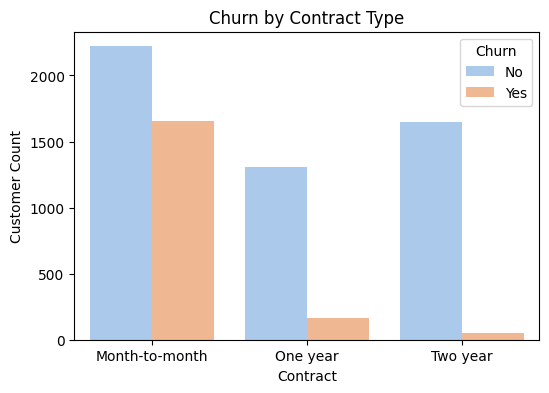

In [ ]:
# Contract Vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

Text(0, 0.5, 'Customer Count')

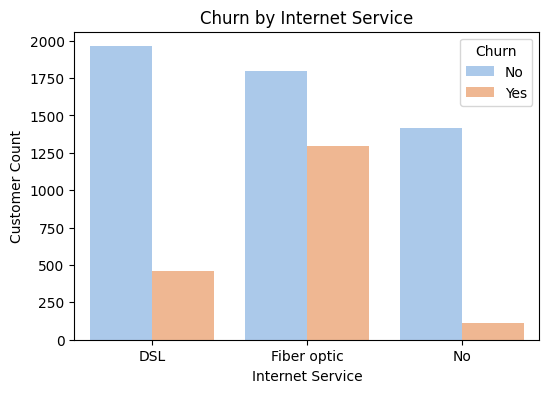

In [8]:
#Internet Service Vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Text(0, 0.5, 'Customer Count')

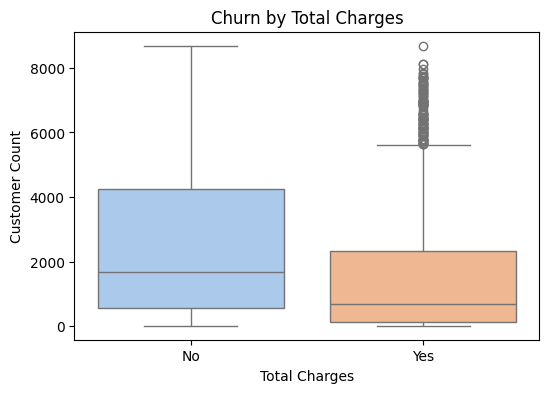

In [12]:
#Total Charges Vs. Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn',y='TotalCharges', data=df, hue='Churn', palette='pastel')
plt.title('Churn by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Customer Count')

##Data Visualization

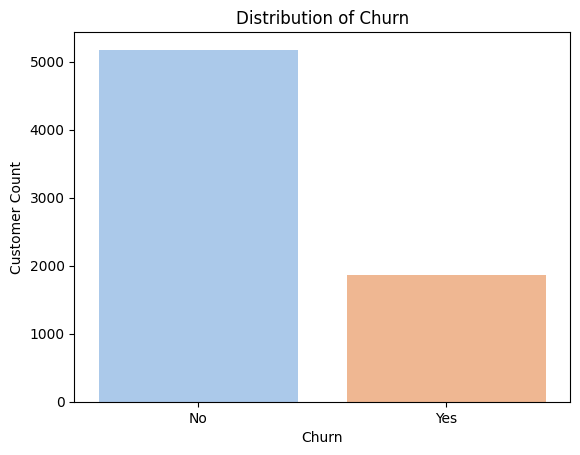

In [ ]:
# Visualizing the Distribution of Churn
# Checks the class balance
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df, hue='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
# Calculate the precentage of churn values
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


/tmp/ipython-input-775487066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Churn",palette="Set2")


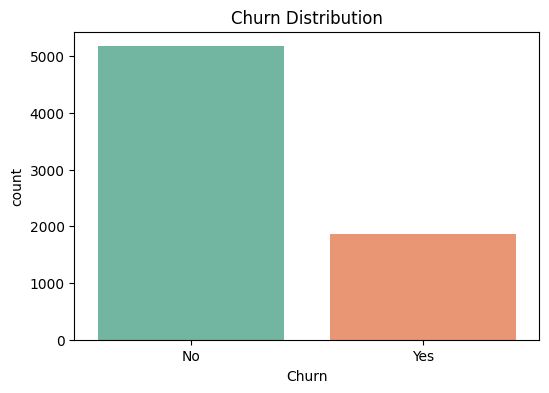

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="Churn",palette="Set2")
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)*100

In [ ]:
# Visualizing the correlation of Churn with other variables

In [ ]:
# Visualizing the tenure values

In [ ]:
# Visualizing the correlation between tenure and churn

# Task 02




Q: Implement the classification task using a Neural network-based model and a Decision Tree model. Conduct
Data preprocessing tasks required for the dataset, problem, and the algorithms. Perform hyperparameter
tuning required for the algorithms. Include all the information regarding your work and results in the report.
Respective libraries, frameworks, tools, etc., must be used for model implementation. The implemented models
should be compared based on the optimal evaluation metrics. Experimental results should be showcased for
both model experimental settings.

List
 - classification using NN and Decision Tree
 - Data Preprocessing for the dataset, problem and algorithm
 - Perform hyperparameter tuning for the algorithms
 - Compare models


In [ ]:
# Handling missing values in TotalCharges

# 1. Converting TotalCharges to a numerical value
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# According to above results there are 11 null values in TotalCharges column
# Those 11 values where imputed with the median of the column

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-1650600015.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
# Removing 'customerID' column because it is unhelpful
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Converting the predictor variable in to a binary values
# Maping 'Yes' and 'No' values to 1 and 0 and any other value to NaN and
# assigning it to the original column
df['Churn']= df['Churn'].map({'Yes':1, 'No':0})


In [ ]:
# TA
# If there are any visualizations - must provide the explanations for what was identified, then only marks will be given for that extra effort

# In viva have to justify why one method was selected over one mthods, justify each optiion and what was not selected
# To justify - In hyperparameter training, in evaluation , evaluation metrix


In [ ]:
# No accuracy is expected - marks are given for the efforts and work
# Upsampling and downsampling can be used to remove the imbalance in data if there is an imbalance

# Data ogmentaion
#synthetic data generation to create more data